<a href="https://colab.research.google.com/github/tec03/continuous_learning/blob/main/7modern_drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling - with Python

An outline for the session:


1. **Introduction to Sampling**

2. **Drawing a Virtual Sample**

   * Understanding the concept of a "virtual shovel."
   * Using `replace=True` for sampling with replacement.
   * Practical demonstration with Python code.

3. **Adding a Replicate Column**

   * What are replicates in sampling?
   * How to add a `replicate` column in a DataFrame using Python.
   * Practical demonstration.

4. **Repeated Sampling and Replication**

   * Generating multiple resamples.
   * Managing and tracking replicate numbers.

5. **Analyzing Sampling Results**

   * Calculating sample statistics.
   * Visualizing sample distributions.

6. **Practical Exercises**

   * Hands-on practice with different sampling techniques.
   * Experimenting with parameters like sample size, with or without replacement.

7. **Summarizing key takeaways**



### 1. Introduction to Sampling

In [1]:
bowl = 'https://raw.githubusercontent.com/tec03/Datasets/refs/heads/main/datasets/bowl_n.csv'
import pandas as pd
df = pd.read_csv(bowl)
df

,ball_ID,color
0,1,white
1,2,white
2,3,white
3,4,red
4,5,white
...,...,...
2395,2396,white
2396,2397,red
2397,2398,white
2398,2399,white


In this case, we know exactly how many red and white balls are present.
  
  However, this may not always be the case.


In [2]:
df.groupby('color').size()

,0
color,
red,900
white,1500


In [3]:
ball_numbers = df.groupby('color').size()
ball_numbers

,0
color,
red,900
white,1500


In [4]:
print('The number of red balls is\t:', ball_numbers['red'])

The number of red balls is	: 900


In most real-world scenarios, we cannot directly determine the true proportion of red balls in the population.

However, in this case, we will see how our sampling technique can help us estimate a value that closely approximates the true proportion.

In [5]:
real_proporsion = ball_numbers['red'] / ball_numbers.sum()
print('The proportion of red balls is\t:', real_proporsion)

The proportion of red balls is	: 0.375


### 2. Draw a virtual sample (like a virtual shovel)

'replace=True' means sampling with replacement - The same row can appear more than once in the sample.

In [6]:
virtual_shovel = df.sample(n=50,
                           replace=True  #sampling with replacement
                           ).reset_index(drop=True) # index restart 1,2,3 from the orginal index; if you keep False, you see the original index.
virtual_shovel.head()

,ball_ID,color
0,437,red
1,1758,white
2,198,white
3,1624,red
4,282,white


### 3. Adding a Replicate Column

- '.insert(0, ...)'	Insert a new column at position 0 (the first/leftmost column) - Useful when doing multiple resamples (e.g., replicate = 1, 2, 3, …) to keep track of which sample each row belongs to.

In [7]:
virtual_shovel.insert(0, 'replicate', 1)
virtual_shovel.head()

,replicate,ball_ID,color
0,1,437,red
1,1,1758,white
2,1,198,white
3,1,1624,red
4,1,282,white


In [8]:
virtual_shovel.shape

(50, 3)

In [9]:
virtual_shovel.color.unique()

array(['red', 'white'], dtype=object)

In [10]:
vs = virtual_shovel.assign(is_red = virtual_shovel.color == 'red') #A new column named 'is_red' is being created.
vs.head()

,replicate,ball_ID,color,is_red
0,1,437,red,True
1,1,1758,white,False
2,1,198,white,False
3,1,1624,red,True
4,1,282,white,False


In [11]:
vs.is_red.value_counts()

,count
is_red,
False,30
True,20


This means that the number and proportion of red and white balls in the first random sample of 50 balls drawn from the bowl are displayed above and further summarized below using a pivot table.


In [12]:
vs_pivot = pd.pivot_table(vs,
                          index='color',
                          values='is_red',
                          aggfunc='count',
                          )
vs_pivot

,is_red
color,
red,20
white,30


In [13]:
vs_pivotn = vs_pivot.assign(percent = (vs_pivot.is_red / vs_pivot.is_red.sum()  ).round(2))
#vs_pivotn["percent (%)"] = (vs_pivot.is_red / vs_pivot.is_red.sum() * 100).round(2)
vs_pivotn

,is_red,percent
color,,
red,20,0.4
white,30,0.6


In [14]:
print('The proporsion of red balls are ', vs_pivotn.loc['red', 'percent'], '%')

The proporsion of red balls are  0.4 %


### 4. Using the virtual shovel 33 times (7.2.2)


* Multiple random samples (with replacement) are drawn from the DataFrame `df`.
* Each sample is assigned a replicate number (`replicate=i+1`).
* These samples are concatenated into one large DataFrame.
* `ignore_index=True` ensures that this large DataFrame has a continuous 0-based index.

We have done previously for one sample "
```
virtual_shovel = df.sample(n=50,
                           replace=True  #sampling with replacement
                           ).reset_index(drop=True) # index restart 1,2,3 from the orginal index; if you keep False, you see the original index.
virtual_shovel.head()
```



* `pd.concat()`: This function is used to concatenate (combine) multiple DataFrames into a single DataFrame.

* `ignore_index=True`: This option ensures that the final concatenated DataFrame has a completely new, continuous index starting from `0`, `1`, `2`, ..., regardless of the original indexes of the individual DataFrames.

* Without `ignore_index=True`, the concatenated DataFrame would retain the original indexes of the DataFrames being combined.
  - This can lead to duplicated index values or non-sequential indexing.

* With `ignore_index=True`, the index of the combined DataFrame is reset to a standard 0-based continuous index.

In [15]:
reps = 33
sample_size = 50

# Create repeated samples with replicate ID
rep_sample_n = pd.concat(
    [df.sample(n=sample_size,
               replace=True).assign(replicate=i+1) for i in range(reps)],
    ignore_index=True
)


rep_sample_n.head()

,ball_ID,color,replicate
0,1214,red,1
1,1457,white,1
2,2107,white,1
3,2052,white,1
4,1146,white,1


In [16]:
rep_sample_n.replicate.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [17]:
rep_sample_n.groupby('replicate').size()
#pd.pivot_table(rep_sample_n, index='replicate', values='color', aggfunc='count')


,0
replicate,
1,50
2,50
3,50
4,50
5,50
6,50
7,50
8,50
9,50


In [18]:
rep_sample_n.shape

(1650, 3)

In [19]:
rep_vs_pivot = pd.pivot_table(rep_sample_n,
                              index=['replicate','color'],
                              values='replicate',
                              aggfunc='count',
                              )

rep_vs_pivot.index.set_names(['rep_id', 'color'],
                             inplace=True
                             )

rep_vs_pivot.rename(columns={'ball_ID': 'count'},
                    inplace=True
                    )
rep_vs_pivot

count
rep_id color       
1      red       23
       white     27
2      red       21
       white     29
3      red       20
...             ...
31     white     30
32     red       16
       white     34
33     red       23
       white     27

[66 rows x 1 columns]

In [20]:
rep_vs_pivot['rep_prop(%)'] = (
    (rep_vs_pivot['count'] / rep_vs_pivot.groupby(level=0)['count'].transform('sum'))
)
rep_vs_pivot

count  rep_prop(%)
rep_id color                    
1      red       23         0.46
       white     27         0.54
2      red       21         0.42
       white     29         0.58
3      red       20         0.40
...             ...          ...
31     white     30         0.60
32     red       16         0.32
       white     34         0.68
33     red       23         0.46
       white     27         0.54

[66 rows x 2 columns]

```python
rep_vs_pivot.groupby(level=0)['count'].transform('sum')
```

* `rep_vs_pivot.groupby(level=0)`:

  * Groups the DataFrame by the first level of the index (`level=0`), which is `rep_id` in the DataFrame (1, 2, 3, ..., 33).
  * Each group contains the rows corresponding to that `rep_id` value.

* `['count']`:

  * Specifies that we are focusing on the `count` column within each group.

* `.transform('sum')`:

  * Calculates the sum of the values in the `count` column for each group.
  * However, instead of returning a single sum value for each group, it broadcasts (repeats) the sum value to all rows within the group.
  * `transform('sum')` keeps the original row structure while adding the total sum for each group.
  * Using `sum()` without `transform` would only return a single value for each group.

In [21]:
colors = rep_vs_pivot.index.get_level_values('color') #other possible values, in this case, 0, 1, 'rep_id'.
colors

Index(['red', 'white', 'red', 'white', 'red', 'white', 'red', 'white', 'red',
       'white', 'red', 'white', 'red', 'white', 'red', 'white', 'red', 'white',
       'red', 'white', 'red', 'white', 'red', 'white', 'red', 'white', 'red',
       'white', 'red', 'white', 'red', 'white', 'red', 'white', 'red', 'white',
       'red', 'white', 'red', 'white', 'red', 'white', 'red', 'white', 'red',
       'white', 'red', 'white', 'red', 'white', 'red', 'white', 'red', 'white',
       'red', 'white', 'red', 'white', 'red', 'white', 'red', 'white', 'red',
       'white', 'red', 'white'],
      dtype='object', name='color')

In [22]:
rep_vs_pivot

count  rep_prop(%)
rep_id color                    
1      red       23         0.46
       white     27         0.54
2      red       21         0.42
       white     29         0.58
3      red       20         0.40
...             ...          ...
31     white     30         0.60
32     red       16         0.32
       white     34         0.68
33     red       23         0.46
       white     27         0.54

[66 rows x 2 columns]

In [23]:
red_df = rep_vs_pivot[colors == 'red']
white_df = rep_vs_pivot[colors == 'white']
red_df.head(3)

,,count,rep_prop(%)
rep_id,color,,
1,red,23,0.46
2,red,21,0.42
3,red,20,0.40


In [24]:
def custom_cls(x):
    if (0<= x <= 0.20):
        return '<= 0.20'
    elif (0.20 < x <= 0.25):
        return '0.21 - 0.25'
    elif (0.25 < x <= 0.30):
        return '0.26 - 0.30'
    elif (0.30 < x <= 0.35):
        return '0.31 - 0.35'
    elif (0.35 < x <= 0.40):
        return '0.36 - 0.40'
    elif (0.40 < x <= 0.45):
        return '0.41 - 0.45'
    elif (0.45 < x <= 0.50):
        return '0.46 - 0.50'
    else:
        return '>=0.51'


red_df.loc[:, 'groups'] =  red_df['rep_prop(%)'].apply(custom_cls)
white_df.loc [:,'groups'] = white_df['rep_prop(%)'].apply(custom_cls)
red_df.head(3)

<ipython-input-24-510cca4c0ecf>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df.loc[:, 'groups'] =  red_df['rep_prop(%)'].apply(custom_cls)
<ipython-input-24-510cca4c0ecf>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_df.loc [:,'groups'] = white_df['rep_prop(%)'].apply(custom_cls)


,,count,rep_prop(%),groups
rep_id,color,,,
1,red,23,0.46,0.46 - 0.50
2,red,21,0.42,0.41 - 0.45
3,red,20,0.40,0.36 - 0.40


In [25]:
prop_pivt = pd.pivot_table(red_df,
               index='groups',
               values='rep_prop(%)',
               aggfunc='count'
               )
prop_pivt

,rep_prop(%)
groups,
0.26 - 0.30,1
0.31 - 0.35,2
0.36 - 0.40,15
0.41 - 0.45,7
0.46 - 0.50,8


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [28]:
plt.style.use('ggplot')

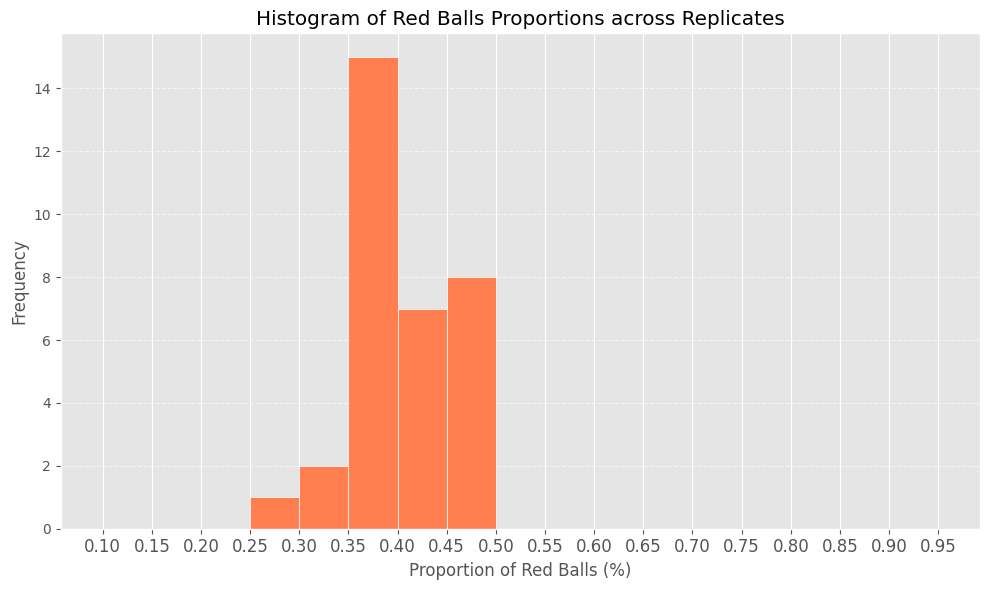

In [29]:
bins = np.arange(0.10, 1, 0.05) # Define exact bin edges

plt.figure(figsize=(10, 6))

plt.hist(red_df['rep_prop(%)'],
         bins=bins,
         edgecolor='white',
         color='coral'
         )


plt.xticks(bins,
           fontsize = 12) #Set exact x-ticks at bin edges

# Labels and title
plt.xlabel('Proportion of Red Balls (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Red Balls Proportions across Replicates')


plt.tight_layout()
plt.grid(axis='y',
         linestyle='--',
         alpha=0.6
         )

plt.show()


In [30]:
prop_pivt

,rep_prop(%)
groups,
0.26 - 0.30,1
0.31 - 0.35,2
0.36 - 0.40,15
0.41 - 0.45,7
0.46 - 0.50,8


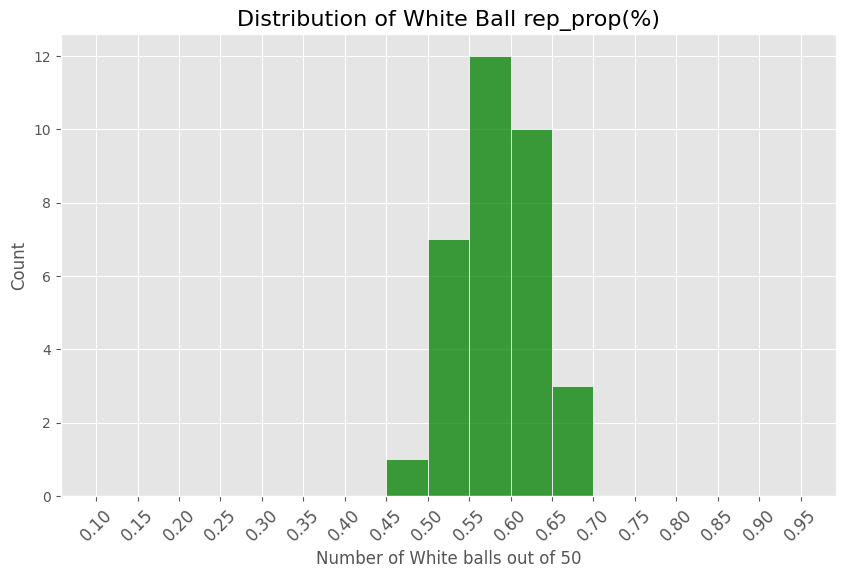

In [31]:
bins = np.arange(0.10, 1, 0.05)

plt.figure(figsize=(10, 6))
sns.histplot(data=white_df,
             x="rep_prop(%)",
             bins=bins,
             color="green",
             edgecolor="white"
             )


plt.xlabel("Number of White balls out of 50")
plt.title("Distribution of White Ball rep_prop(%)", fontsize=16)


plt.xticks(bins,
           fontsize = 12,
           rotation = 45)

plt.show()

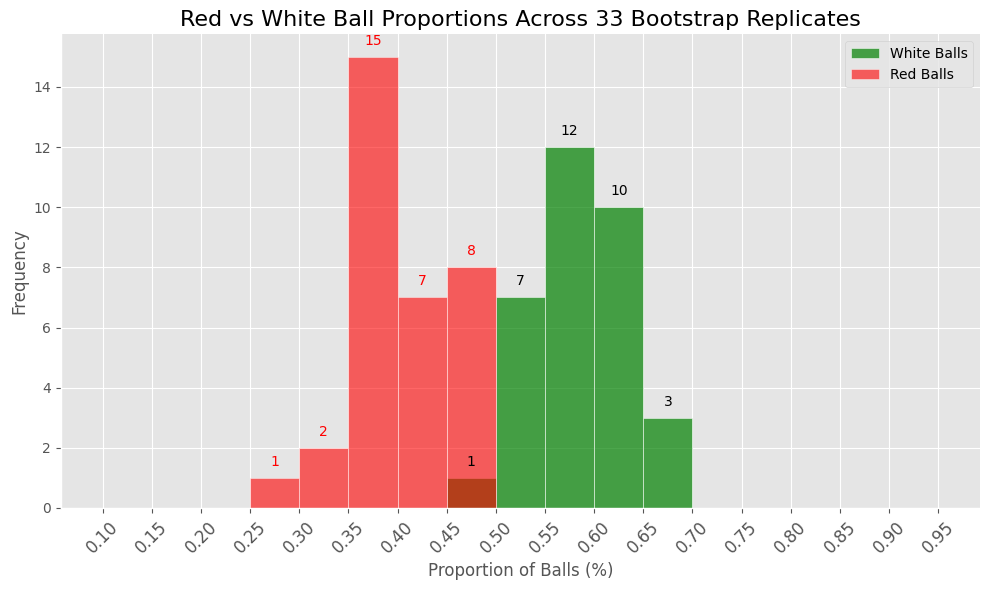

In [32]:
bins = np.arange(0.10, 1, 0.05)

plt.figure(figsize=(10, 6))

# White histogram (behind)
counts_white, _, _ = plt.hist(
    white_df['rep_prop(%)'],
    bins=bins,
    color="green",
    edgecolor="white",
    alpha=0.7,
    label="White Balls"
)

# Red histogram (overlaid)
counts_red, _, _ = plt.hist(
    red_df['rep_prop(%)'],
    bins=bins,
    color="red",
    edgecolor="white",
    alpha=0.6,
    label="Red Balls"
)

# Annotate frequencies on top of each bar.
bin_centers = 0.5 * (bins[:-1] + bins[1:])

for x, y in zip(bin_centers, counts_white):
    if y > 0:
        plt.text(x, y + 0.3, int(y), ha='center', va='bottom', fontsize=10, color='black')

for x, y in zip(bin_centers, counts_red):
    if y > 0:
        plt.text(x, y + 0.3, int(y), ha='center', va='bottom', fontsize=10, color='red')

# Labels
plt.xlabel("Proportion of Balls (%)")
plt.ylabel("Frequency")
plt.title("Red vs White Ball Proportions Across 33 Bootstrap Replicates", fontsize=16)
plt.xticks(bins, fontsize = 12, rotation = 45)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


#### **Conclusion from the Histogram:**

1. **Distribution of Proportions:**

   * The red balls and white balls exhibit distinct distributions in the  replicates.
   * The proportion of red balls has a peak around **0.35 (35%)**, with the highest frequency at this range.
   * The proportion of white balls is generally higher, with a peak around **0.65 (65%)**, indicating a greater presence of white balls in the majority of the samples.

2. **Comparative Frequency:**

   * The red ball proportions are concentrated in the range **0.25 - 0.45**, with the highest count at **0.35**.
   * The white ball proportions are concentrated in the range **0.55 - 0.75**, with the highest count at **0.65**.



The distribution for red and white ball proportions is consistent across 33  replicates, reflecting the underlying population structure (more white balls than red)


### 5 Using the virtual shovel 1,000 times

In [33]:
df.head()

,ball_ID,color
0,1,white
1,2,white
2,3,white
3,4,red
4,5,white


In [34]:
reps = 1000
sample_size = 50


largeDf = pd.concat(
    [df.sample(n=sample_size, replace=True).assign(replicate=i+1) for i in range(reps)],
    ignore_index=True
)


largeDf.head()

,ball_ID,color,replicate
0,2182,white,1
1,1304,red,1
2,934,white,1
3,769,white,1
4,856,white,1


In [35]:
largeDf.replicate.unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [36]:
l_df = pd.pivot_table(largeDf,
                      index=['replicate','color'],
                      values='replicate',
                      aggfunc='count'
                      )
l_df

ball_ID
replicate color         
1         red         21
          white       29
2         red         22
          white       28
3         red         22
...                  ...
998       white       29
999       red         18
          white       32
1000      red         14
          white       36

[2000 rows x 1 columns]

In [37]:
l_df.rename(columns={'ball_ID': 'count'}, inplace=True)
l_df

count
replicate color       
1         red       21
          white     29
2         red       22
          white     28
3         red       22
...                ...
998       white     29
999       red       18
          white     32
1000      red       14
          white     36

[2000 rows x 1 columns]

In [38]:
l_df['rep_prop'] = (
    (l_df['count'] / l_df.groupby(level=0)['count'].transform('sum'))
)
l_df

count  rep_prop
replicate color                 
1         red       21      0.42
          white     29      0.58
2         red       22      0.44
          white     28      0.56
3         red       22      0.44
...                ...       ...
998       white     29      0.58
999       red       18      0.36
          white     32      0.64
1000      red       14      0.28
          white     36      0.72

[2000 rows x 2 columns]

In [39]:
reds = l_df.index.get_level_values('color') == 'red'
reds

array([ True, False,  True, ..., False,  True, False])

In [40]:
whites = l_df.index.get_level_values('color') == 'white'
whites

array([False,  True, False, ...,  True, False,  True])

In [41]:
red_ldf = l_df[reds]
white_ldf = l_df[whites]
red_ldf.head(3)

,,count,rep_prop
replicate,color,,
1,red,21,0.42
2,red,22,0.44
3,red,22,0.44


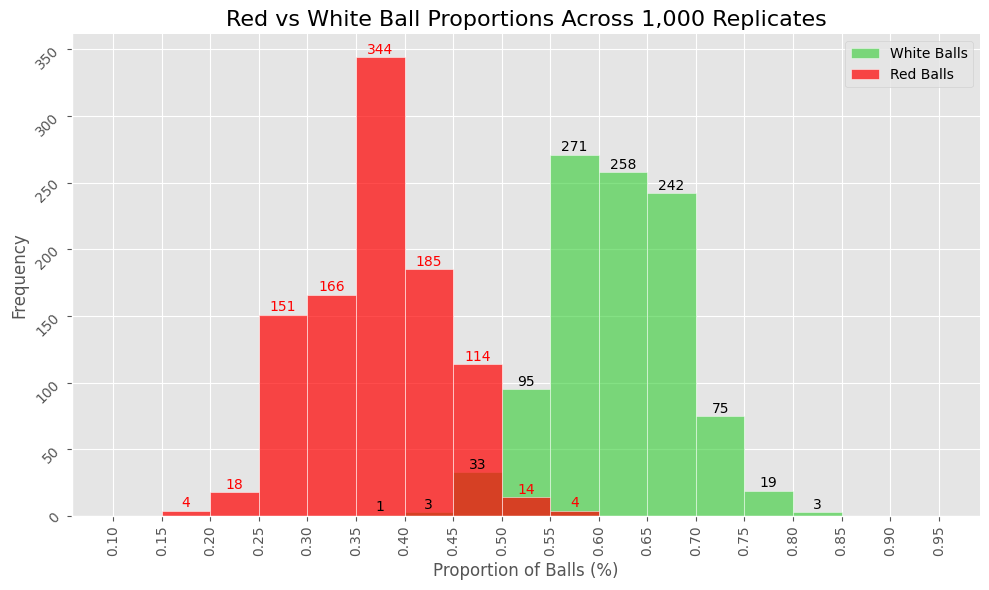

In [42]:
plt.figure(figsize=(10, 6))

# White histogram (behind)
counts_white, _, _ = plt.hist(
    white_ldf['rep_prop'],
    bins=bins,
    color="limegreen",
    edgecolor="white",
    alpha=0.6,
    label="White Balls"
)

# Red histogram (overlaid)
counts_red, _, _ = plt.hist(
    red_ldf['rep_prop'],
    bins=bins,
    color="red",
    edgecolor="white",
    alpha=0.7,
    label="Red Balls"
)

# Annotate frequencies
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for x, y in zip(bin_centers, counts_white):
    if y > 0:
        plt.text(x, y + 0.3, int(y), ha='center', va='bottom', fontsize=10, color='black')
for x, y in zip(bin_centers, counts_red):
    if y > 0:
        plt.text(x, y + 0.3, int(y), ha='center', va='bottom', fontsize=10, color='red')

# Labels
plt.xlabel("Proportion of Balls (%)")
plt.ylabel("Frequency")
plt.title("Red vs White Ball Proportions Across 1,000 Replicates", fontsize=16)
plt.xticks(bins, fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10, rotation = 45)
plt.legend(fontsize = 10)
sns.despine()
plt.tight_layout()
plt.show()

In [43]:
white_ldf

,,count,rep_prop
replicate,color,,
1,white,29,0.58
2,white,28,0.56
3,white,28,0.56
4,white,32,0.64
5,white,29,0.58
...,...,...,...
996,white,30,0.60
997,white,36,0.72
998,white,29,0.58


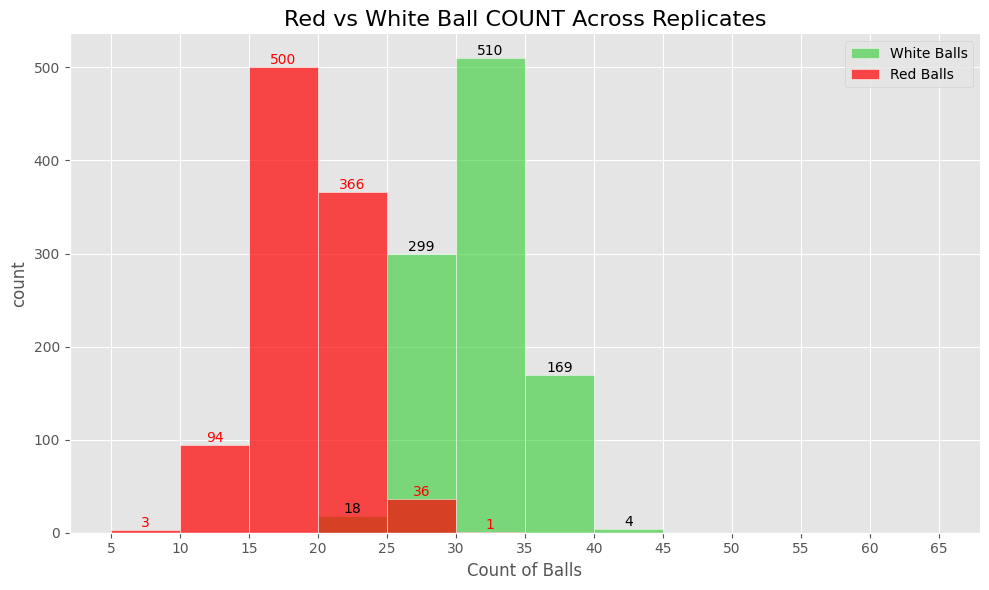

In [44]:
# Bin edges and fig size.
bins = np.arange(5, 70, 5)

plt.figure(figsize=(10, 6))


# White histogram (behind)
counts_white, _, _ = plt.hist(
    white_ldf['count'],
    bins=bins,
    color="limegreen",
    edgecolor="white",
    alpha=0.6,
    label="White Balls"
)

# Red histogram (overlaid)
counts_red, _, _ = plt.hist(
    red_ldf['count'],
    bins=bins,
    color="red",
    edgecolor="white",
    alpha=0.7,
    label="Red Balls"
)

# Annotate frequencies
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for x, y in zip(bin_centers, counts_white):
    if y > 0:
        plt.text(x, y + 0.3, int(y), ha='center', va='bottom', fontsize=10, color='black')
for x, y in zip(bin_centers, counts_red):
    if y > 0:
        plt.text(x, y + 0.3, int(y), ha='center', va='bottom', fontsize=10, color='red')

# Labels
plt.xlabel("Count of Balls")
plt.ylabel("count")
plt.title("Red vs White Ball COUNT Across Replicates", fontsize=16)
plt.xticks(bins)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


### 6. Using different shovels -  Showel of size 25, 50 & 100   (7.2.4)

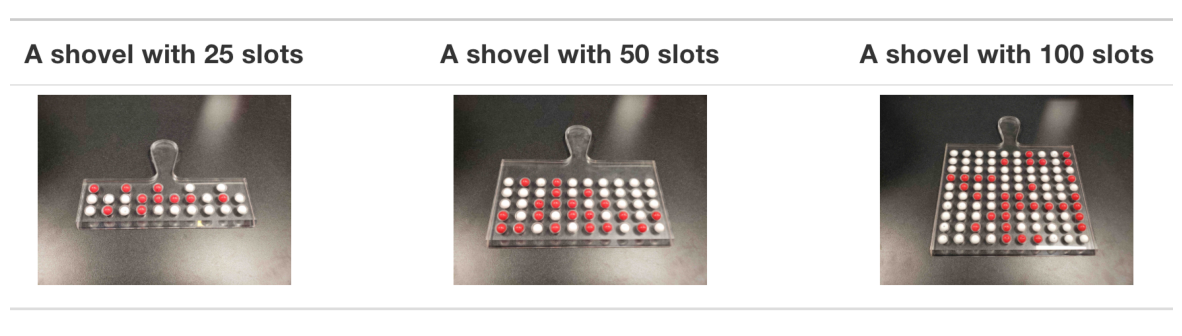

In [45]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

image_url = "https://github.com/tec03/Datasets/blob/main/images/three_shovels.png?raw=true"


response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

plt.figure(figsize=(15, 10))  # Adjust width and height
plt.imshow(img)
plt.axis('off')
plt.show()


Objective: To explore how the *sample size* affects the distribution of the *sample proportions* of red balls in a set of random samples.

For:

  * We will take random samples of different sizes (25, 50, and 100 balls) and calculate the proportion of red balls in each sample.
  * By doing this repeatedly (1,000 times), we will visualize how the distribution of these proportions changes with sample size.

In [46]:
df

,ball_ID,color
0,1,white
1,2,white
2,3,white
3,4,red
4,5,white
...,...,...
2395,2396,white
2396,2397,red
2397,2398,white
2398,2399,white


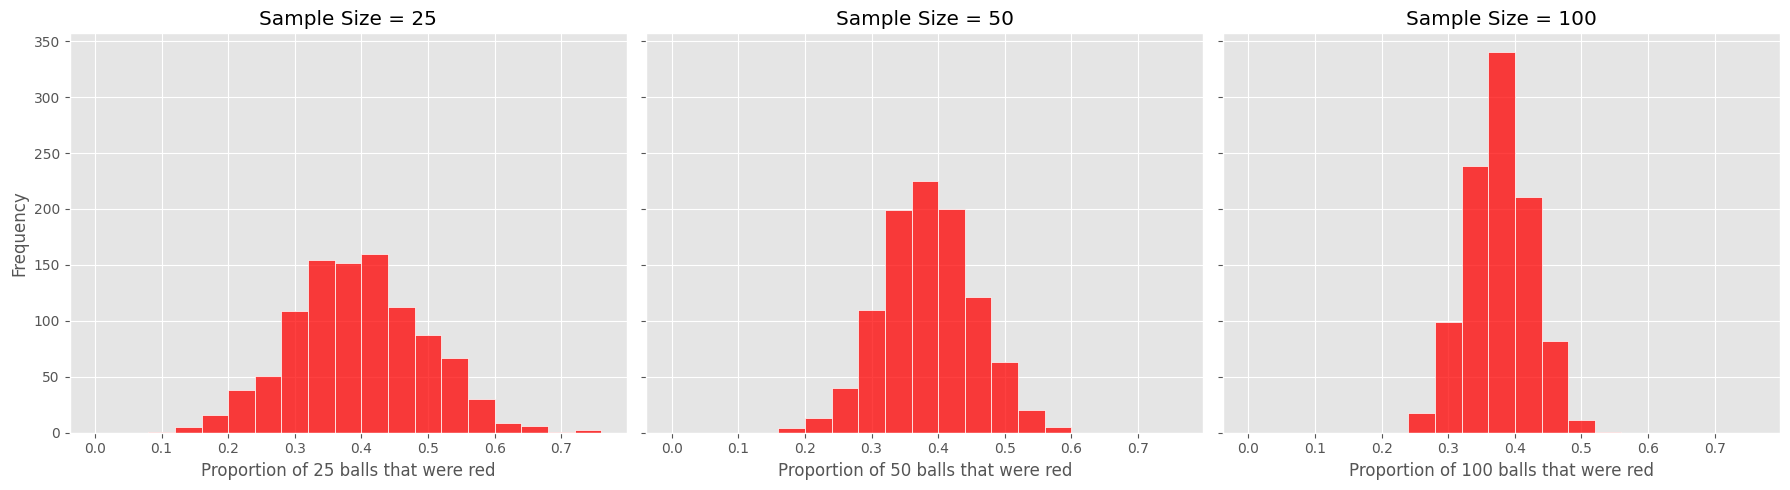

In [47]:
def bootstrap_proportions(bowl_df, size, reps):
    results = []
    for _ in range(reps):
        sample = bowl_df.sample(n=size, replace=True)
        red_count = (sample['color'] == 'red').sum()
        results.append(red_count / size)
    return pd.DataFrame({'prop_red': results})



sizes = [25, 50, 100]
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Loop through each sample size
for i, size in enumerate(sizes):
    prop_df = bootstrap_proportions(df, size=size, reps=1000)
    sns.histplot(
        data=prop_df,
        x='prop_red',
        bins=np.arange(0, 0.8, 0.04),
        color='red',
        edgecolor='white',
        ax=axs[i]
    )
    axs[i].set_title(f"Sample Size = {size}")
    axs[i].set_xlabel(f"Proportion of {size} balls that were red")
    axs[i].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

As sample size increases, the distribution of the sample proportions becomes more consistent and closer to the true population proportion.


- The sample size (showel size) increases, the variation of the 1000 replicates of the proportion of red decreases.
  - As the sample size increases, there are fewer differences due to sampling variation
  - The distribution centers more tightly around the same value.
- Eyeballing Figures all three histograms appear to center around roughly 40%.

- Larger sample sizes provide more accurate and consistent estimates of the true proportion in the population.
  - This is a fundamental principle of statistical sampling – larger samples yield more reliable estimates.

####  Standard deviation

In [48]:
red_25 = bootstrap_proportions(df, size=25, reps=1000)
red_50 = bootstrap_proportions(df, size=50, reps=1000)
red_100 = bootstrap_proportions(df, size=100, reps=1000)

sd_25 = red_25['prop_red'].std()
sd_50 = red_50['prop_red'].std()
sd_100 = red_100['prop_red'].std()

print(f"Standard Deviation (n=25) : {sd_25:.4f}")
print(f"Standard Deviation (n=50) : {sd_50:.4f}")
print(f"Standard Deviation (n=100): {sd_100:.4f}")

Standard Deviation (n=25) : 0.1006
Standard Deviation (n=50) : 0.0697
Standard Deviation (n=100): 0.0495


In [49]:
df.color.value_counts()

,count
color,
white,1500
red,900


### 7.  Conclusion and The moral of the story

In [50]:
print("Population proportion (p):", df['color'].value_counts()['red'] / len(df))

Population proportion (p): 0.375


We perform these simulations in order to study:

1. The effect of sampling variation on our estimates.
2. The effect of sample size on sampling variation.

- A `point estimate` (`sample statistic`), is a summary statistic computed from `a sample` that estimates the unknown population parameter.

In [51]:
virtual_shovel = df.sample(n=50,
                           replace=True
                           ).reset_index(drop=True)
virtual_shovel.head()

,ball_ID,color
0,512,white
1,126,red
2,1995,red
3,2191,red
4,732,white


In [52]:
reds = virtual_shovel['color'] == 'red'
virtual_shovel[reds]

,ball_ID,color
1,126,red
2,1995,red
3,2191,red
5,2323,red
8,2016,red
14,2206,red
16,1083,red
18,713,red
19,1477,red
22,1650,red


In [53]:
point_estimate = virtual_shovel[reds].shape[0] / virtual_shovel.shape[0]
print("Sample proportion (p̂):", point_estimate)

Sample proportion (p̂): 0.44


In [54]:
population_proporsion = df['color'].value_counts()['red'] / len(df)
print("Population proportion (p):", population_proporsion)

Population proportion (p): 0.375


In [55]:
prop_df

,prop_red
0,0.32
1,0.37
2,0.37
3,0.29
4,0.37
...,...
995,0.37
996,0.27
997,0.33
998,0.46


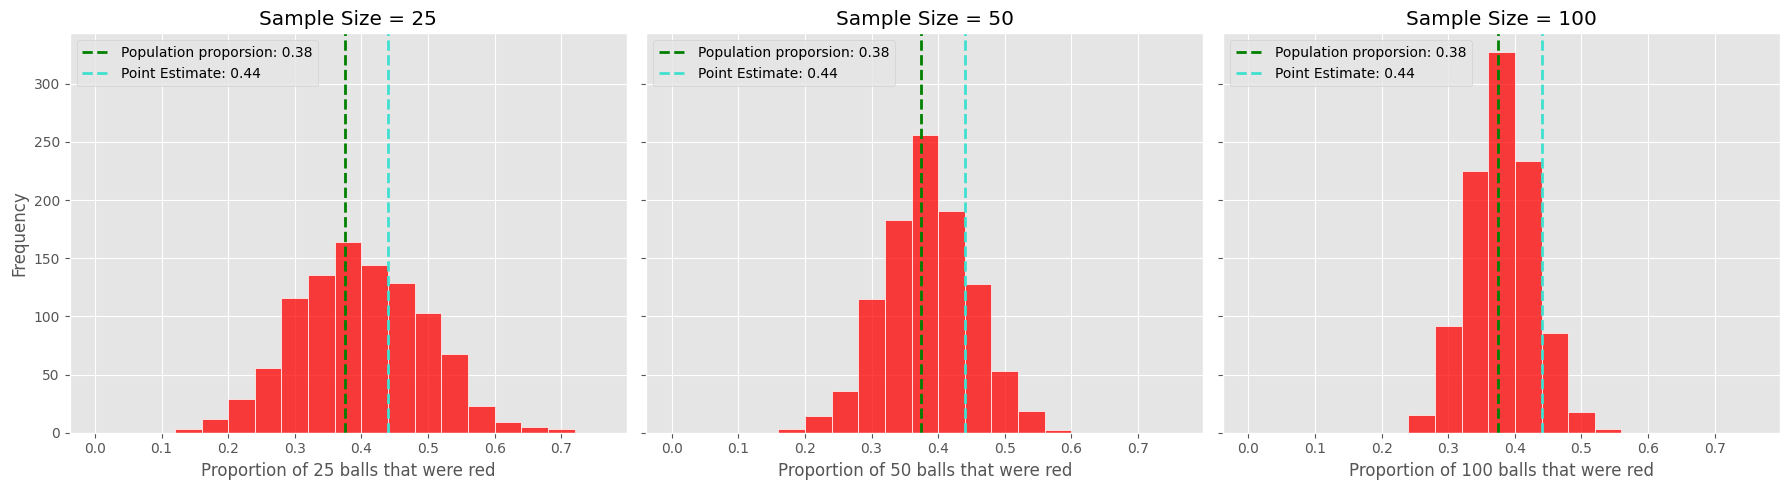

In [56]:
def bootstrap_proportions(bowl_df, size, reps):
    results = []
    for _ in range(reps):
        sample = bowl_df.sample(n=size, replace=True)
        red_count = (sample['color'] == 'red').sum()
        results.append(red_count / size)
    return pd.DataFrame({'prop_red': results})



sizes = [25, 50, 100]
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Loop through each sample size
for i, size in enumerate(sizes):
    prop_df = bootstrap_proportions(df, size=size, reps=1000)
    sns.histplot(
        data=prop_df,
        x='prop_red',
        bins=np.arange(0, 0.8, 0.04),
        color='red',
        edgecolor='white',
        ax=axs[i]
    )
    axs[i].set_title(f"Sample Size = {size}")
    axs[i].set_xlabel(f"Proportion of {size} balls that were red")
    axs[i].set_ylabel("Frequency")
    # Adding vertical line for Population proporsion
    axs[i].axvline(population_proporsion,
                  color='green',
                  linestyle='--',
                  linewidth=2,
                  label=f'Population proporsion: {population_proporsion:.2f}')
    # Adding vertical line for Point Estimate
    axs[i].axvline(point_estimate,
                  color='turquoise',
                  linestyle='--',
                  linewidth=2,
                  label=f'Point Estimate: {point_estimate:.2f}')

    axs[i].legend(loc='upper left')

plt.tight_layout()
plt.show()

### Concluding Remarks

In this analysis, we explored the relationship between sample size and the variability of estimated proportions using sampling.

Our results are summarized in three histograms representing samples of 25, 50, and 100 balls. The following key observations can be made:

1. **Impact of Sample Size on Variability:**

   * Smaller samples (25 balls) exhibit higher variability, with the distribution of red ball proportions being wider. This reflects the greater uncertainty associated with small samples.
   * As the sample size increases (50 and 100 balls), the distribution becomes narrower, indicating more consistent estimates of the proportion of red balls.

2. **Convergence to Population Proportion:**

   * The green dashed line in each plot represents the **true population proportion** (0.38), while the turquoise dashed line represents the **point estimate** derived from the samples (0.46).
   * Although the point estimate differs slightly from the true proportion, the distributions show a clear trend of converging towards the true proportion as the sample size increases.

3. **Theoretical Confirmation:**

   * This outcome is consistent with the **Law of Large Numbers**, which states that as the sample size increases, the sample proportion approaches the population proportion.
   * The variability (spread) of the distribution decreases with larger samples, further confirming the reliability of larger samples in estimating the true population value.


